# Contents

## 01 Import libraries and data

## 02 Explore relationships

### 02.1 Correlations

#### 02.1.1 Observations from correlation heatmap

### 02.2 Scatterplots

#### 02.2.1 Scatterplot year_built and number of commercial units

#### 02.2.2 Scatterplot for sale_price and number of commercial units

#### 02.2.3 Scatterplot for sale_price and number of total units

#### 02.2.4 Scatterplot for sale_price and number of residential units

#### 02.2.5 Scatterplot for sale_price and land_square_feet

#### 02.2.6 Scatterplot for sale_price and gross_square_feet

#### 02.2.7 Scatterplot for sale_price and year_built

### 02.3 Pairplot for at-a-glance overview of relevant numerical variables

### 02.4 Categorical plots

#### 02.4.1 Effect of building age on sale price

#### 02.4.2 Effect of building age and property size (land square feet) on sale price

#### 02.4.3 Effect of building tax class on sale price

## 03 Export dataframe

# 01 Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path = r'/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-05-07_NYC property sales/02_Data/02_Prepared data'

In [3]:
# Import data
df = pd.read_pickle(os.path.join(path, '2023-05-14_df.pkl'))

In [4]:
# Get dimensions of df
df.shape

(1665722, 18)

In [5]:
# Get varialbe in df
df.columns

Index(['borough_code', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'easement', 'building_class_at_present',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'sale_price_flag', 'borough_name'],
      dtype='object')

In [6]:
# Get datatypes in df
df.dtypes

borough_code                              object
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
easement                                  object
building_class_at_present                 object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_price_flag                           object
borough_name                              object
dtype: object

In [7]:
# Inspect head of df
df.head()

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island


# 02 Explore relationships

In [8]:
# Check current directory in anticipation of saving visuals
cwd = os.getcwd()
cwd

'/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-05-07_NYC property sales/03_Scripts'

In [9]:
# Change current directory in anticipation of saving visuals
os.chdir('/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-05-07_NYC property sales/04_Analysis/01 Visuals')

## 02.1 Correlations

In [10]:
# Get variable names
df.columns

Index(['borough_code', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'easement', 'building_class_at_present',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'sale_price_flag', 'borough_name'],
      dtype='object')

In [11]:
# Create subset with relevant columns
sub = df[['residential_units', 'commercial_units', 'total_units', 'land_square_feet', 'gross_square_feet', 'year_built', 'sale_price']]

In [12]:
# Check subset
sub

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price
0,1,0,1,3654.0,910.0,2002,764000.0
1,1,0,1,7654.0,2277.0,1980,1098000.0
2,1,0,1,13320.0,4696.0,1985,0.0
3,1,0,1,8190.0,1528.0,1970,890000.0
4,1,0,1,10500.0,2278.0,1980,0.0
...,...,...,...,...,...,...,...
1916225,1,0,1,1975.0,1346.0,1958,195000.0
1916243,1,0,1,1975.0,1346.0,1958,220000.0
1916245,1,0,1,1975.0,1346.0,1957,250000.0
1916253,1,0,1,1975.0,1346.0,1957,114500.0


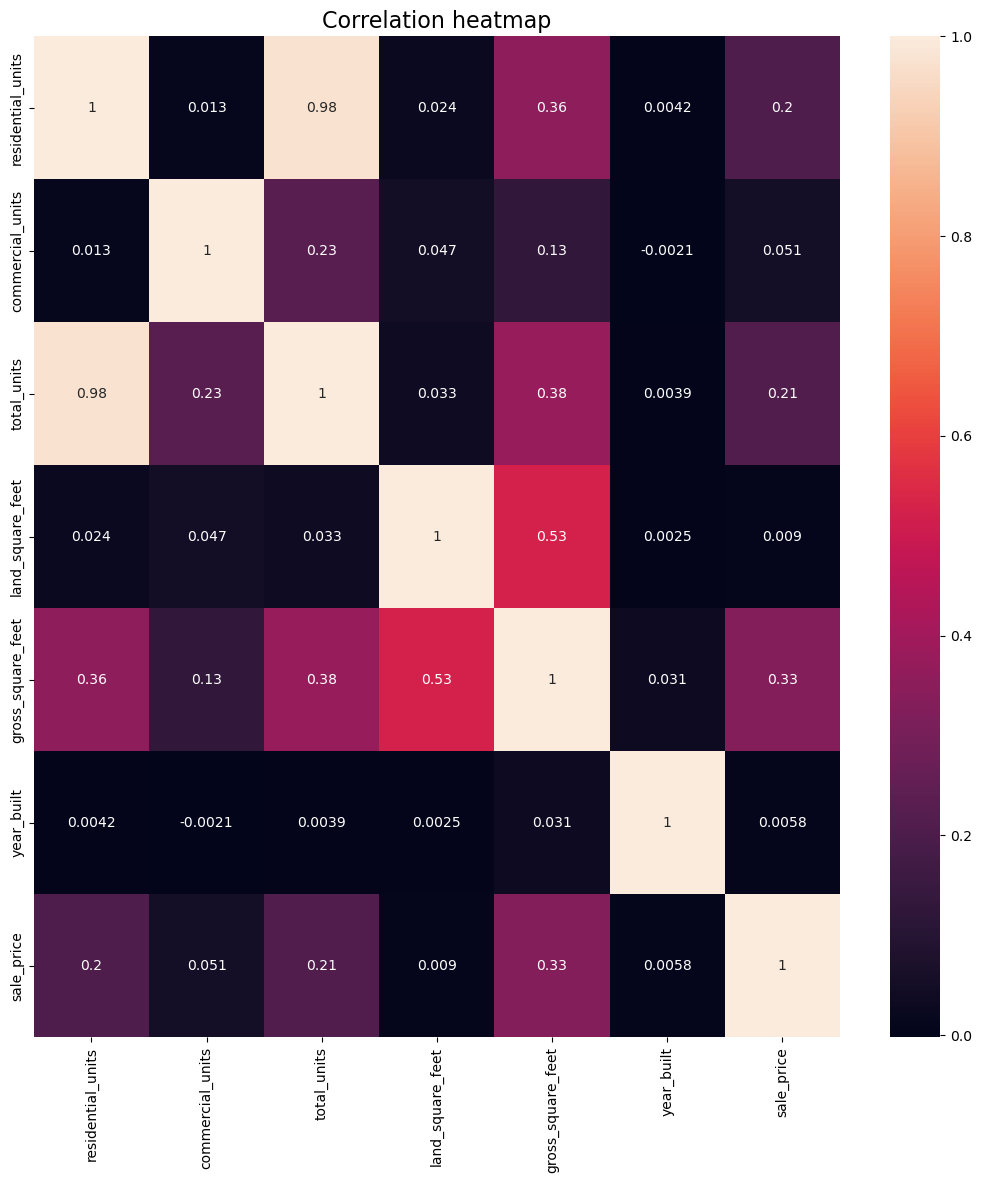

In [13]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(13,13))

# Create correlation heatmap by applying heatmap onto correlation matrix and subplot
# Use annot argument to place correlation coefficients onto heatmap
corr = sns.heatmap(sub.corr(), annot=True, ax=ax)

# Add a title
plt.title('Correlation heatmap', fontsize=16)

# Save visual
plt.savefig('2023-05-27_corr-heatmap.png')

### 02.1.1 Observations from correlation heatmap

First of all, it is noteworthy that all correlations except for one are positive. 

The only negative, very weak correlation is between year_built and number of commercial units: the lower the year_built, the higher the number of commercial units and vice versa. This is interesting and merits further investigation through a scatterplot of the two variables. 

Besides this, it is most interesting to see how the relationship between sale price (considered dependent) and the other variables (considered independent) is.

Furthermore, there’s a weak positive relationship between the number of residential units or the number of total units and sale price. 

The relationship between the number of commercial units and sale prices is positive, too, but it is much weaker as the other two relationships with numbers of units.

The relationship between land square feet and sale price is very, very weak whereas the relationship between gross square feet and sale price can be considered moderate. 

Lastly, the relationship between year_built and sale price is a weak one. 

To further probe into these observations, scatterplots will be created for all relationships mentioned.

## 02.2 Scatterplots

### 02.2.1 Scatterplot year_built and number of commercial units

<Figure size 1000x1000 with 0 Axes>

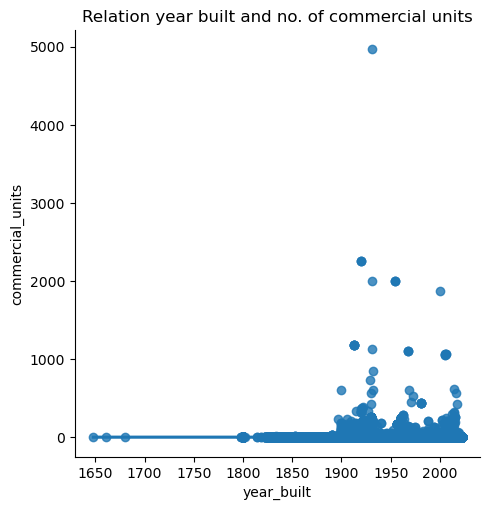

In [14]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does year_built affect number of commercial units
sns.lmplot(data=df, x='year_built', y='commercial_units')

# Add a title
plt.title('Relation year built and no. of commercial units')

# Save visual
plt.savefig('2023-05-27_scatter_year-commercial')

The relationship is not linear. The scatterplot shows that shortly before 1900, the number of commercial units was 0. With the turn of the century, the number of commercial units on properties sold grew, but the bulk of properties is in the low three-digit range. The explanation for the weak, negative relationship is likely the extreme outlier of a property with almost 5000 commercial units built before 1950. It is worth looking deper into this observation to check whether it should be kept for the analysis or rather discarded.

### 02.2.2 Scatterplot for sale_price and number of commercial units

<Figure size 1000x1000 with 0 Axes>

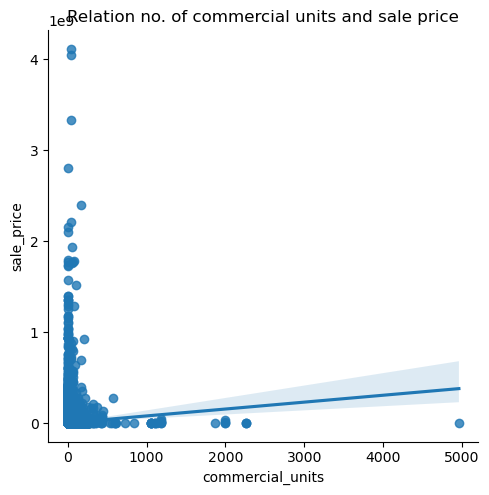

In [15]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does the number of commercial units affect the sale price
sns.lmplot(data=df, x='commercial_units', y='sale_price')

# Add a title
plt.title('Relation no. of commercial units and sale price')

# Save visual
plt.savefig('2023-05-27_scatter_commercial-price')

The relationship is not linear. Rather, it is characterised by the outlier property with almost 5000 commercial units that already affected the relation between year_built and number of commercial units. Furthermore, it is interesting that sale prices for properties with a number of commercial units below 500 can be quite high, but drop to a low value from above 500 units. It could be interesting to investigate this further by categorising properties into ones with low, moderate and high numbers of commercial units. 

Similarly, it might be interesting to create sale price categories as there's a very low number of properties that sold for incredible sums of above 2 billion dollars. Excluding them for some analysis may lead to results that more realistically predict sale price development as variance is much lower in the price segment below 2 billion dollars. 

### 02.2.3 Scatterplot for sale_price and number of total units

<Figure size 1000x1000 with 0 Axes>

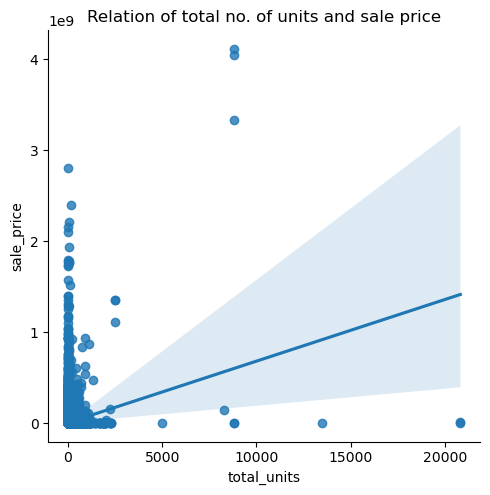

In [16]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does the total number of units affect the sale price
sns.lmplot(data=df, x='total_units', y='sale_price')

# Add a title
plt.title('Relation of total no. of units and sale price')

# Save visual
plt.savefig('2023-05-27_scatter_totunits-price')

The relationship is non-linear and again characterised by outliers of very high sale prices and five outliers with a total number of units between ca. 5000 and up to above 20000. 

Again, it could be interesting to investigate this further by categorising properties into ones with low, moderate and high total numbers of units.
Similarly, it might be interesting to create sale price categories as there's a very low number of properties that sold for incredibly high sums.

### 02.2.4 Scatterplot for sale_price and number of residential units

<Figure size 1000x1000 with 0 Axes>

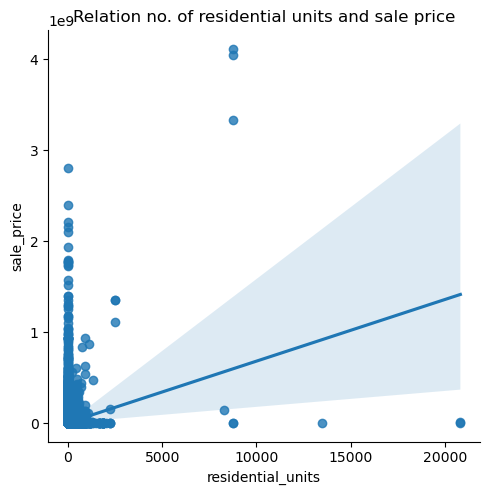

In [17]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does the number of residential units affect the sale price
sns.lmplot(data=df, x='residential_units', y='sale_price')

# Add a title
plt.title('Relation no. of residential units and sale price')

# Save visual
plt.savefig('2023-05-27_scatter_residential-price')

The relationship is non-linear and again characterised by outliers of very high sale prices and four outliers with a number of residential units between ca. 7000 and up to above 20000.

Again, it could be interesting to investigate this further by categorising properties into ones with low, moderate and high numbers of residential units. Similarly, it might be interesting to create sale price categories as there's a very low number of properties that sold for incredibly high sums.

### 02.2.5 Scatterplot for sale_price and land_square_feet

<Figure size 1000x1000 with 0 Axes>

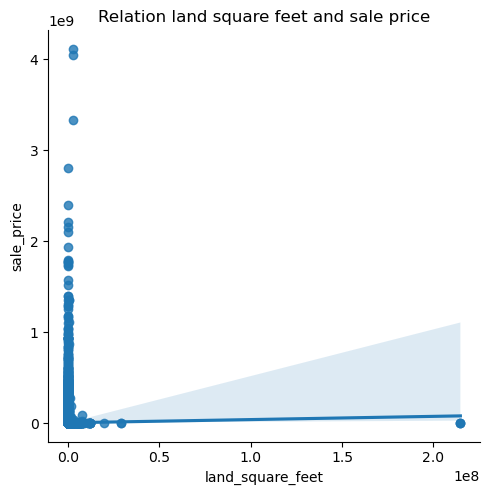

In [18]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does the property size in land square feet affect the sale price
sns.lmplot(data=df, x='land_square_feet', y='sale_price')

# Add a title
plt.title('Relation land square feet and sale price')

# Save visual
plt.savefig('2023-05-27_scatter_ldsqfeet-price')

While the correlation coefficient suggested a very weak positive relationship, there may actually be a stronger positive relationship since the correlation is affected by an outlier of a very large property that sold for 0 or little more than 0 dollars. 

As mentioned in the context of the other scatterplot visualisations, it may also be interesting to create sale price categories in order to avoid distortion from outliers of very high sale prices. 

### 02.2.6 Scatterplot for sale_price and gross_square_feet

<Figure size 1000x1000 with 0 Axes>

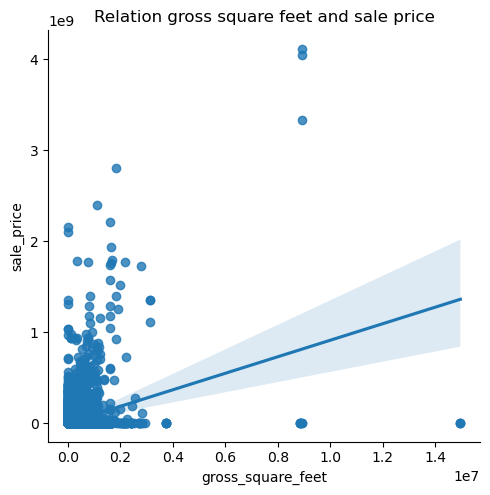

In [19]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does the property size in gross square feet affect the sale price
sns.lmplot(data=df, x='gross_square_feet', y='sale_price')

# Add a title
plt.title('Relation gross square feet and sale price')

# Save visual
plt.savefig('2023-05-27_scatter_grsqfeet-price')

This is the first scatterplot which seems to confirm an actual positive linear relation between property size in gross square feet and sale price. While the correlation coefficient indicated a moderate relationship, it could even be that there's a strong relationship when omitting the outliers of very high prices and very big property size. It would be interesting to investigate this further.

### 02.2.7 Scatterplot for sale_price and year_built

<Figure size 1000x1000 with 0 Axes>

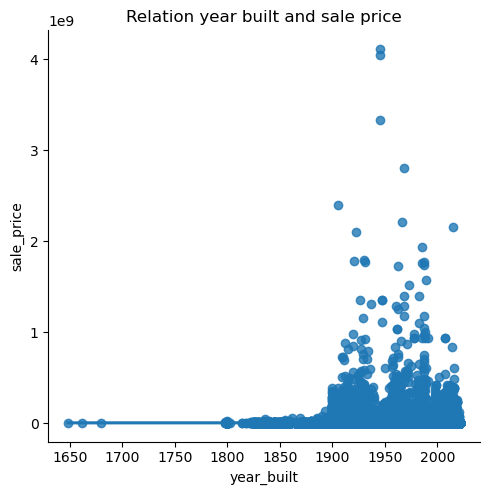

In [20]:
# Adapt figure size
f = plt.figure(figsize=(10,10))

# How does the year built affect the sale price
sns.lmplot(data=df, x='year_built', y='sale_price')

# Add a title
plt.title('Relation year built and sale price')

# Save visual
plt.savefig('2023-05-27_scatter_yearbuilt-price')

The relationship seems to be exponential rather than linear. However, the picture might literally look different when looking only at properties with building year 1900 and older. It could well be that the relationship would in that case be indeed linear, and potentially much stronger than indicated by the correlation coefficient for year_built and sale_date in the full dataset. Merits further investigation!

## 02.3 Pairplot for at-a-glance overview of relevant numerical variables

In [21]:
# Split subset 95-5 (i.e. to get a small sample with ca. 83.000 rows)
np.random.seed(5)
dev1=np.random.rand(len(sub))<=0.05

In [22]:
# Create samples
sub_samp5 = sub[dev1]
sub_samp95 = sub[~dev1]

In [23]:
# Check size of sub_samp5
sub_samp5.shape

(83035, 7)

In [24]:
# Check size of sub_samp95
sub_samp95.shape

(1582687, 7)

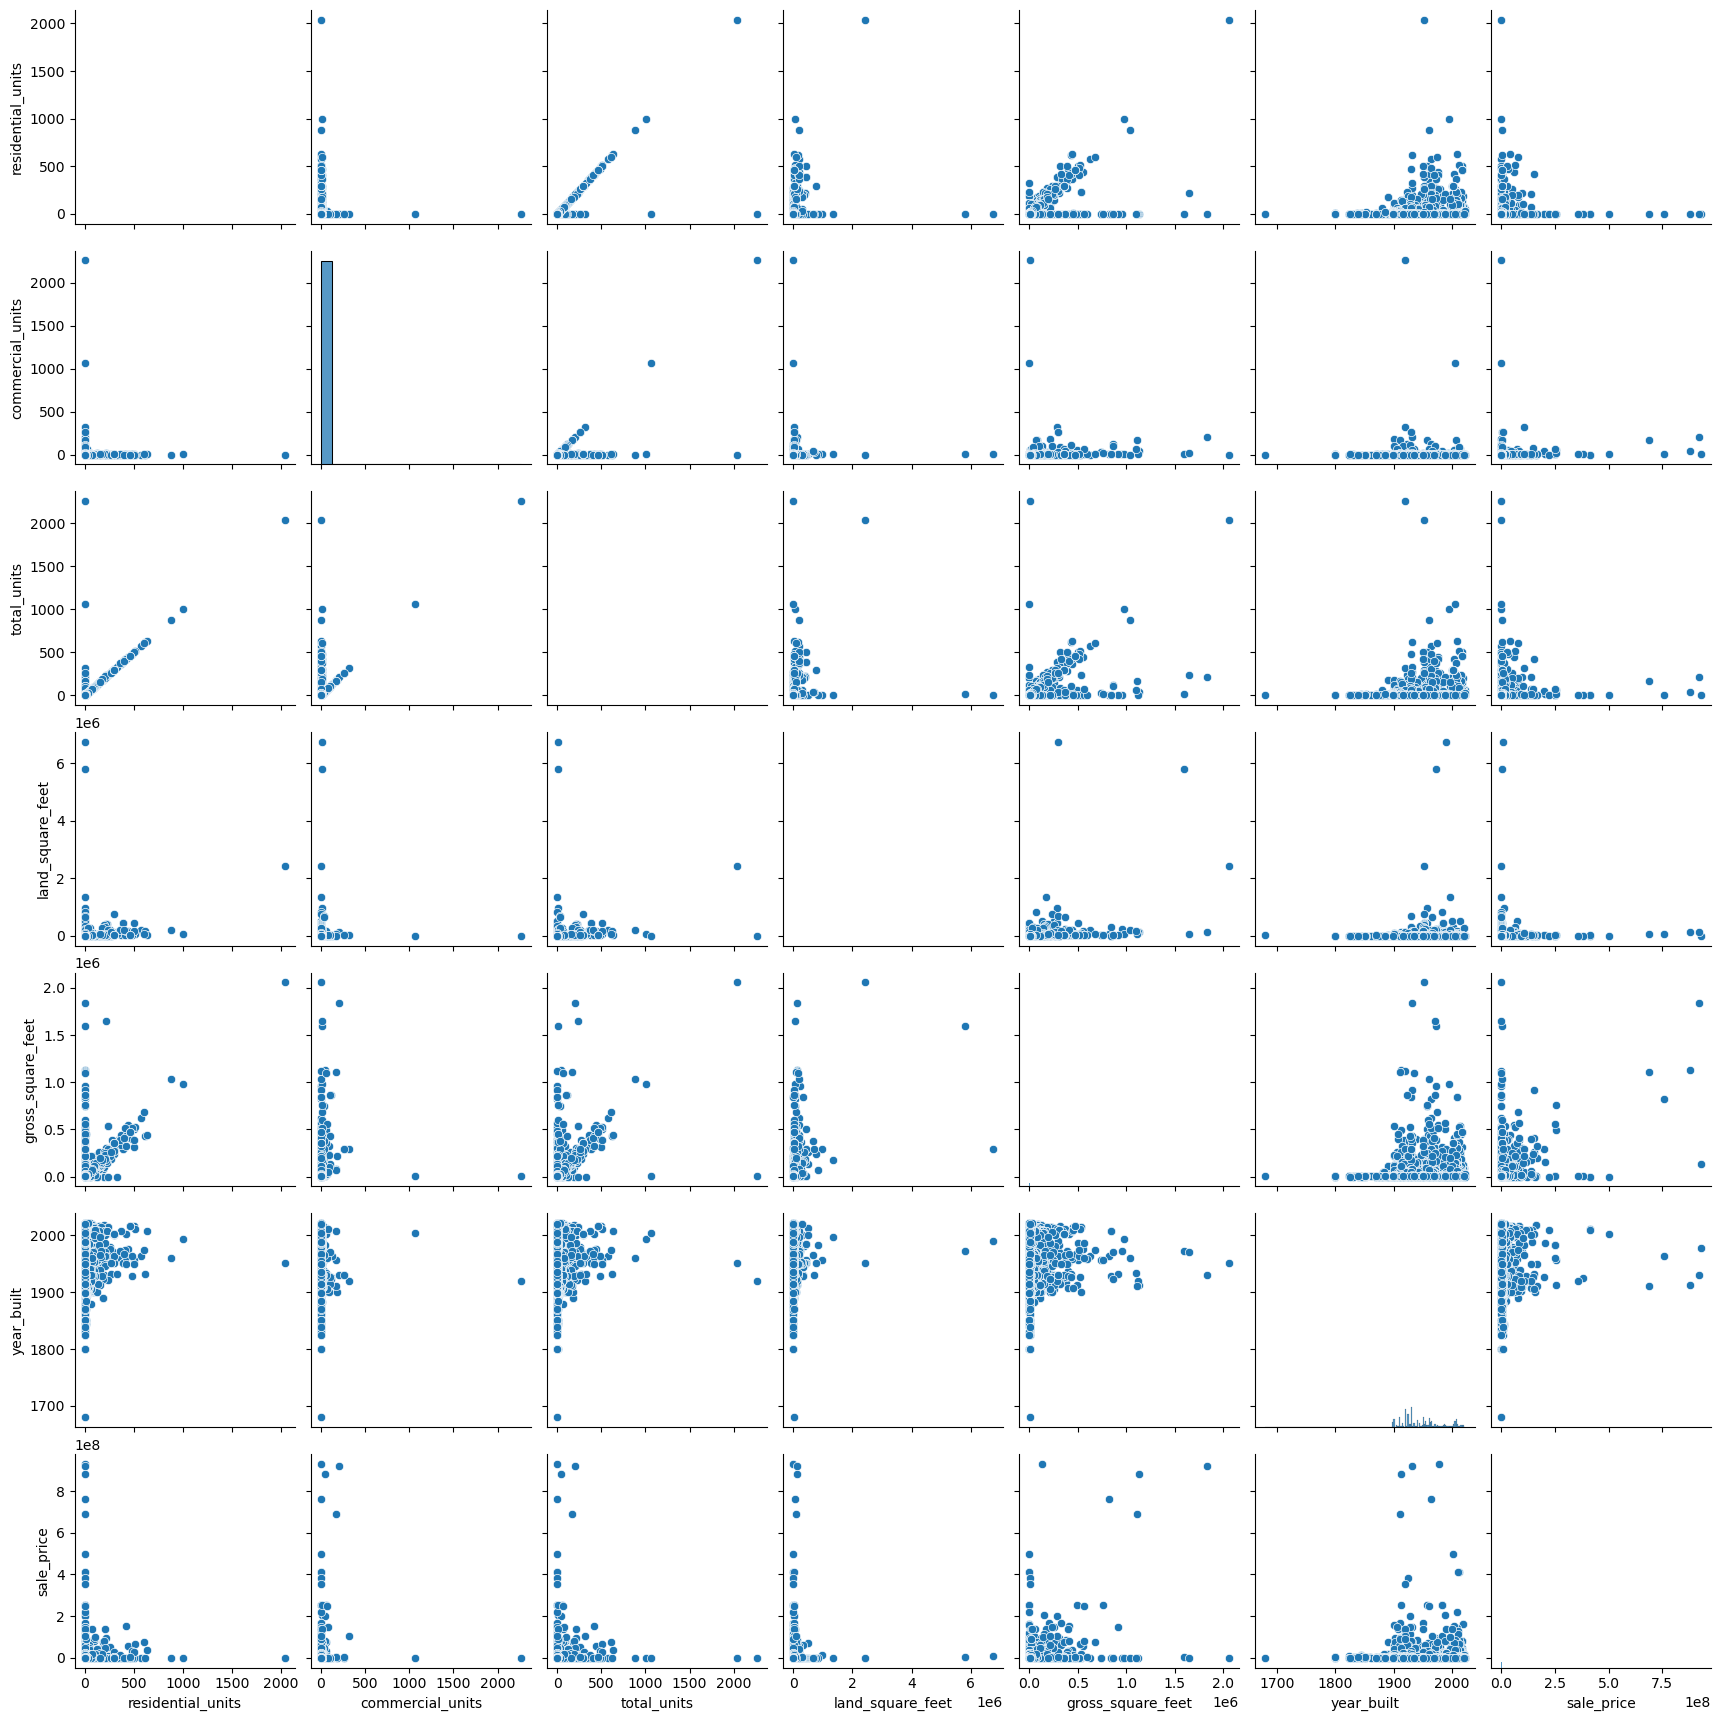

In [25]:
# Create pair plot
g=sns.pairplot(sub_samp5)

# Save visual
plt.savefig('pairplot_samp5.png')

In [26]:
# Split subset 9-10 (i.e. to get a small sample with ca. 166.000 rows)
np.random.seed(5)
dev2=np.random.rand(len(sub))<=0.1

In [27]:
# Create samples
sub_samp10 = sub[dev2]
sub_samp90 = sub[~dev2]

In [28]:
# Check size of sub_samp10
sub_samp10.shape

(165885, 7)

In [29]:
# Check size of sub_samp90
sub_samp90.shape

(1499837, 7)

In [31]:
# Create pair plot
g=sns.pairplot(sub_samp10)

# Save visual
plt.savefig('pairplot_samp10.png') 

# Operation attempted and stopped unsuccesfully after 30 minutes

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fcaf0079f70> (for post_execute):


KeyboardInterrupt: 

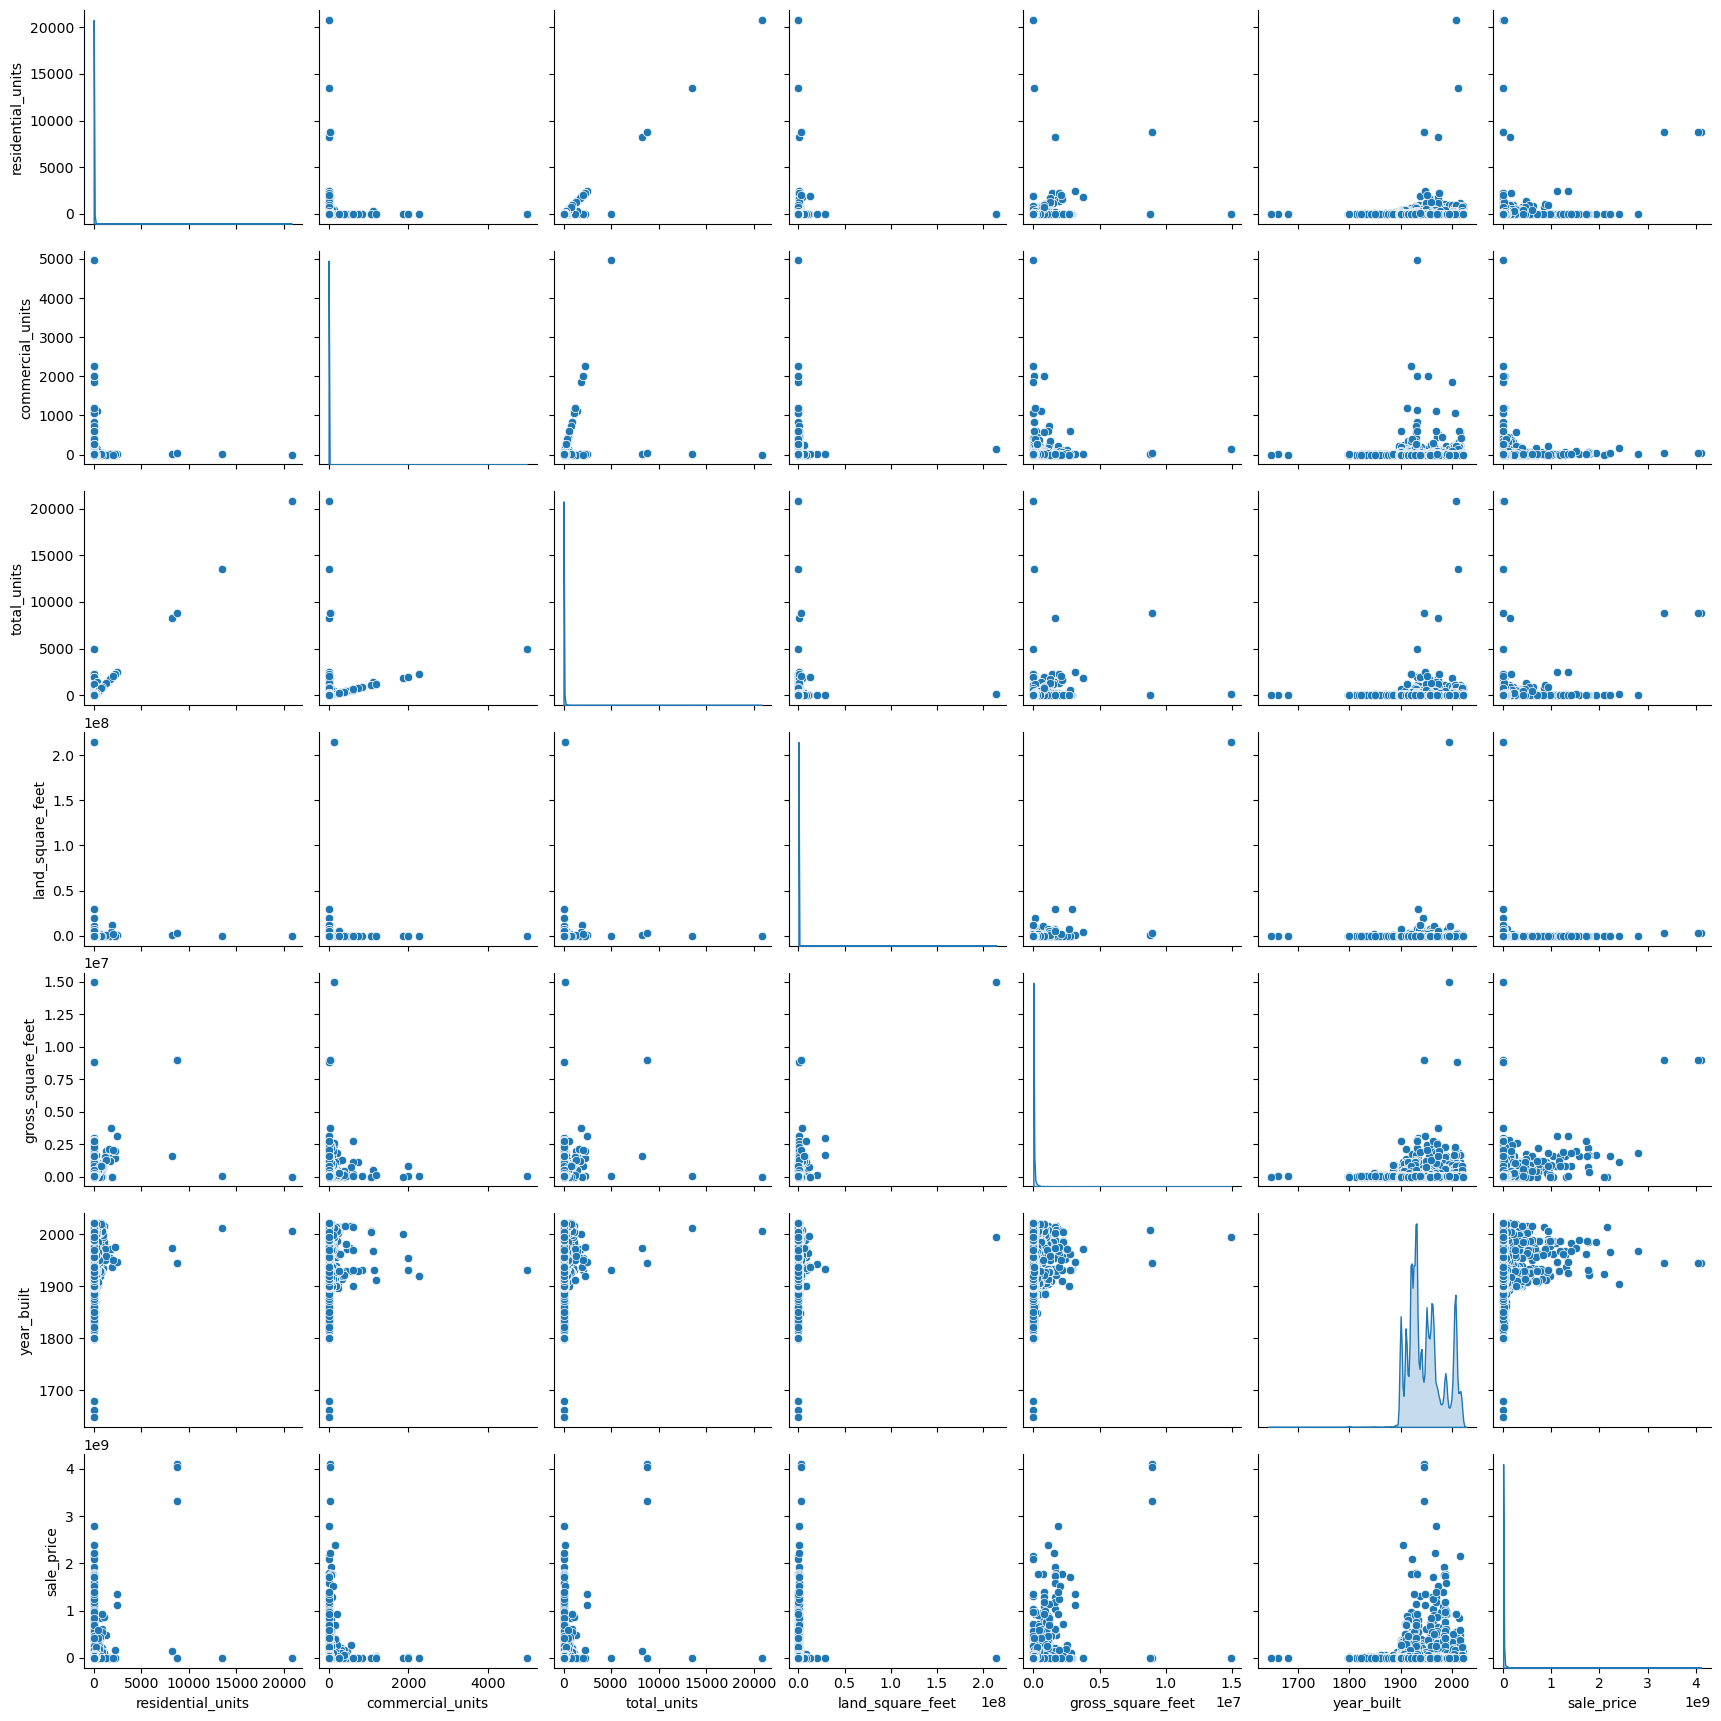

In [32]:
# Create pair plot
# Use kernel density estimator to speed up creation of histograms
g=sns.pairplot(sub, diag_kind='kde')

# Save visual
plt.savefig('pairplot_kde.png')

The histograms in the pair plot from the 5% sample as well as the smoothened graphs in the pair plot from the full dataset show that distribution of all variables is highly skewed. In that sense, the pair plot confirms the assumptions on skewness from the scatterplots. For the remaining analysis, I will therefore consider excluding outliers by using the interquartile rule. 

As outlined above, in the further analysis I will mostly focus on sale_price as dependent variable to better understand what has driven sale prices in the past and possibly predict future sale prices. 

Besides this, I'm particularly interested in taking a closer look at how the building year of a property influences its sale price. From looking at the respective scatterplot it can be seen that it's not the newest buildings that yield the highest sale prices. How prices can be reasonably categorised into low, medium and high prices should first be checked with a histogram of sale prices.

## 02.4 Categorical plots

### 02.4.1 Effect of building age on sale price

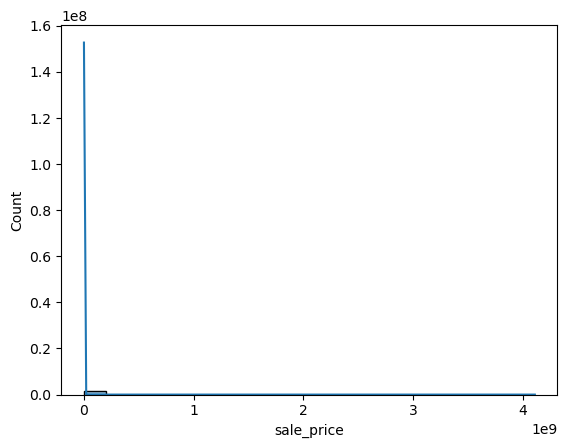

In [33]:
# Created histogram to determine categories of low, medium and high prices
# Add kde argument to add a line encompassing distribution
sns.histplot(df['sale_price'], bins=20, kde=True)

plt.savefig('2023-05-28_hist-saleprice')

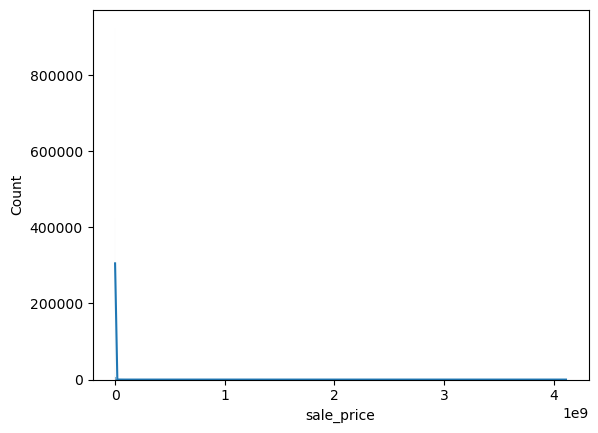

In [34]:
# Create second histogram with more bins
sns.histplot(df['sale_price'], bins=10000, kde=True)

plt.savefig('2023-05-28_hist2-saleprice')

In [35]:
# Get descriptive stats on sale_price to support decision on categories
df['sale_price'].describe()

count    1.665722e+06
mean     9.438209e+05
std      1.158814e+07
min      0.000000e+00
25%      0.000000e+00
50%      3.500000e+05
75%      6.800000e+05
max      4.111112e+09
Name: sale_price, dtype: float64

In [36]:
# Create subset without 0 dollar sales
sub_sales = df[df['sale_price']!=0]

In [37]:
# Check dimensions of sub_sales
sub_sales.shape

(1181788, 18)

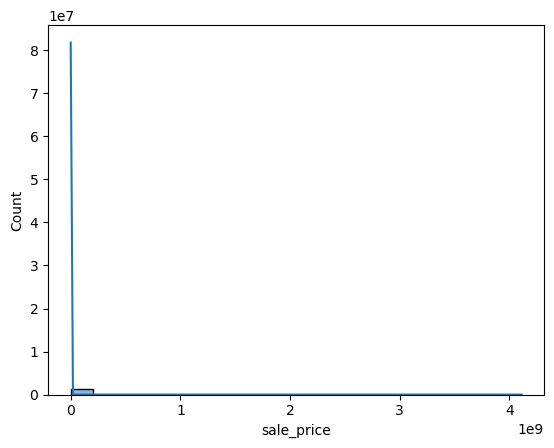

In [38]:
# Create third histogram with 0 values sales_price excluded
sns.histplot(sub_sales['sale_price'], bins=20, kde=True)

plt.savefig('2023-05-28_hist3-saleprice')

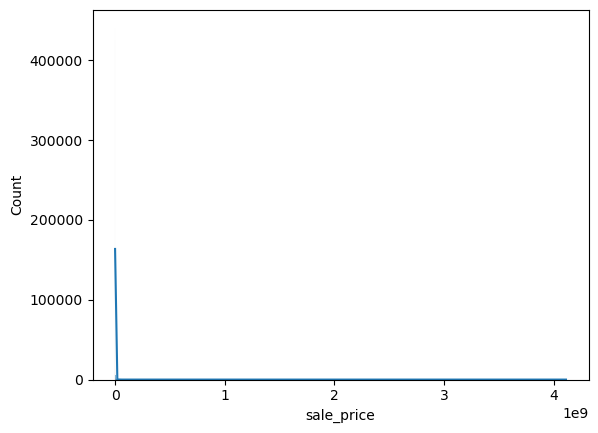

In [39]:
# Create forth histogram with 0 values sales_price excluded and more bins
sns.histplot(sub_sales['sale_price'], bins=10000, kde=True)

plt.savefig('2023-05-28_hist4-saleprice')

In [40]:
# Get descriptive stats on sale_price with 0 values excluded to support decision on categories
sub_sales['sale_price'].describe()

count    1.181788e+06
mean     1.330309e+06
std      1.373898e+07
min      1.000000e+00
25%      3.125000e+05
50%      5.200000e+05
75%      8.566870e+05
max      4.111112e+09
Name: sale_price, dtype: float64

In [41]:
# Create column for categorical variable on zero, low, medium and high sale price
df.loc[df['sale_price'] <312500, 'sale_price_cat'] = 'low'
df.loc[(df['sale_price'] >=312500) & (df['sale_price'] <856687), 'sale_price_cat'] = 'medium'
df.loc[df['sale_price'] >=856687, 'sale_price_cat'] = 'high'
df.loc[df['sale_price'] ==0, 'sale_price_cat'] = 'zero'

In [42]:
# Check assignment of categorical variable
df['sale_price_cat'].value_counts(dropna=False)

medium    590991
zero      483934
high      295447
low       295350
Name: sale_price_cat, dtype: int64

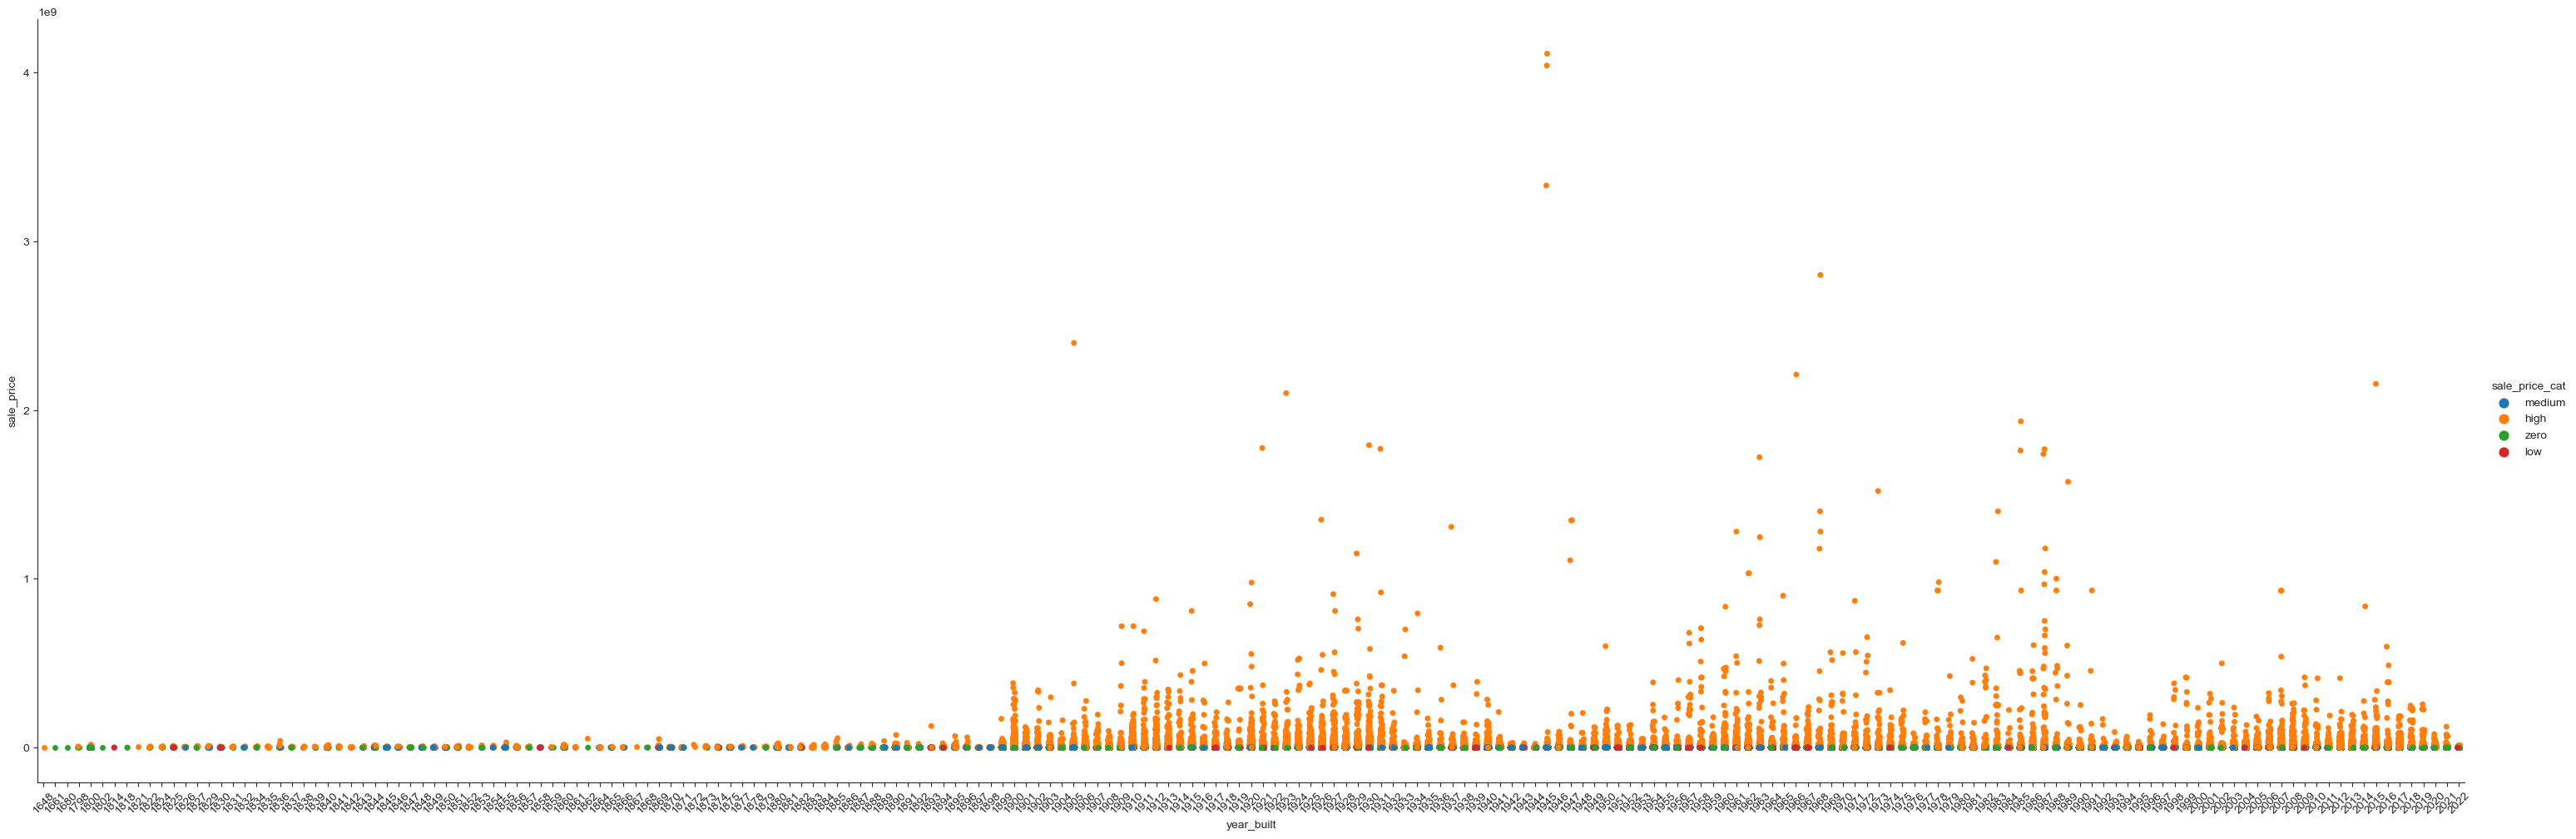

In [43]:
# Create categorical plot to visualise effect of building age on sale price
# Choose plot style
sns.set_style('ticks')

# Create plot and adjust height and width
g=sns.catplot(data=df, x='year_built', y='sale_price', hue='sale_price_cat', height=10, aspect=3)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Save visual
plt.savefig('2023-05-28_catplot-buildage-price')

What can be seen from this - hard to read - categorical plot is that a property's age does not seem to affect its sale price. What appears as a dotted line with shades of four colours low on the y-axis shows that for very old building as well as for very new buildings prices from all price categories are paid. There's no clear relationship such as "very old buildings sell for low prices" or "new buildings sale for high prices". In conclusion, age alone does not seem a decisive factor for a property's sale price. 

### 02.4.2 Effect of building age and property size (land square feet) on sale price

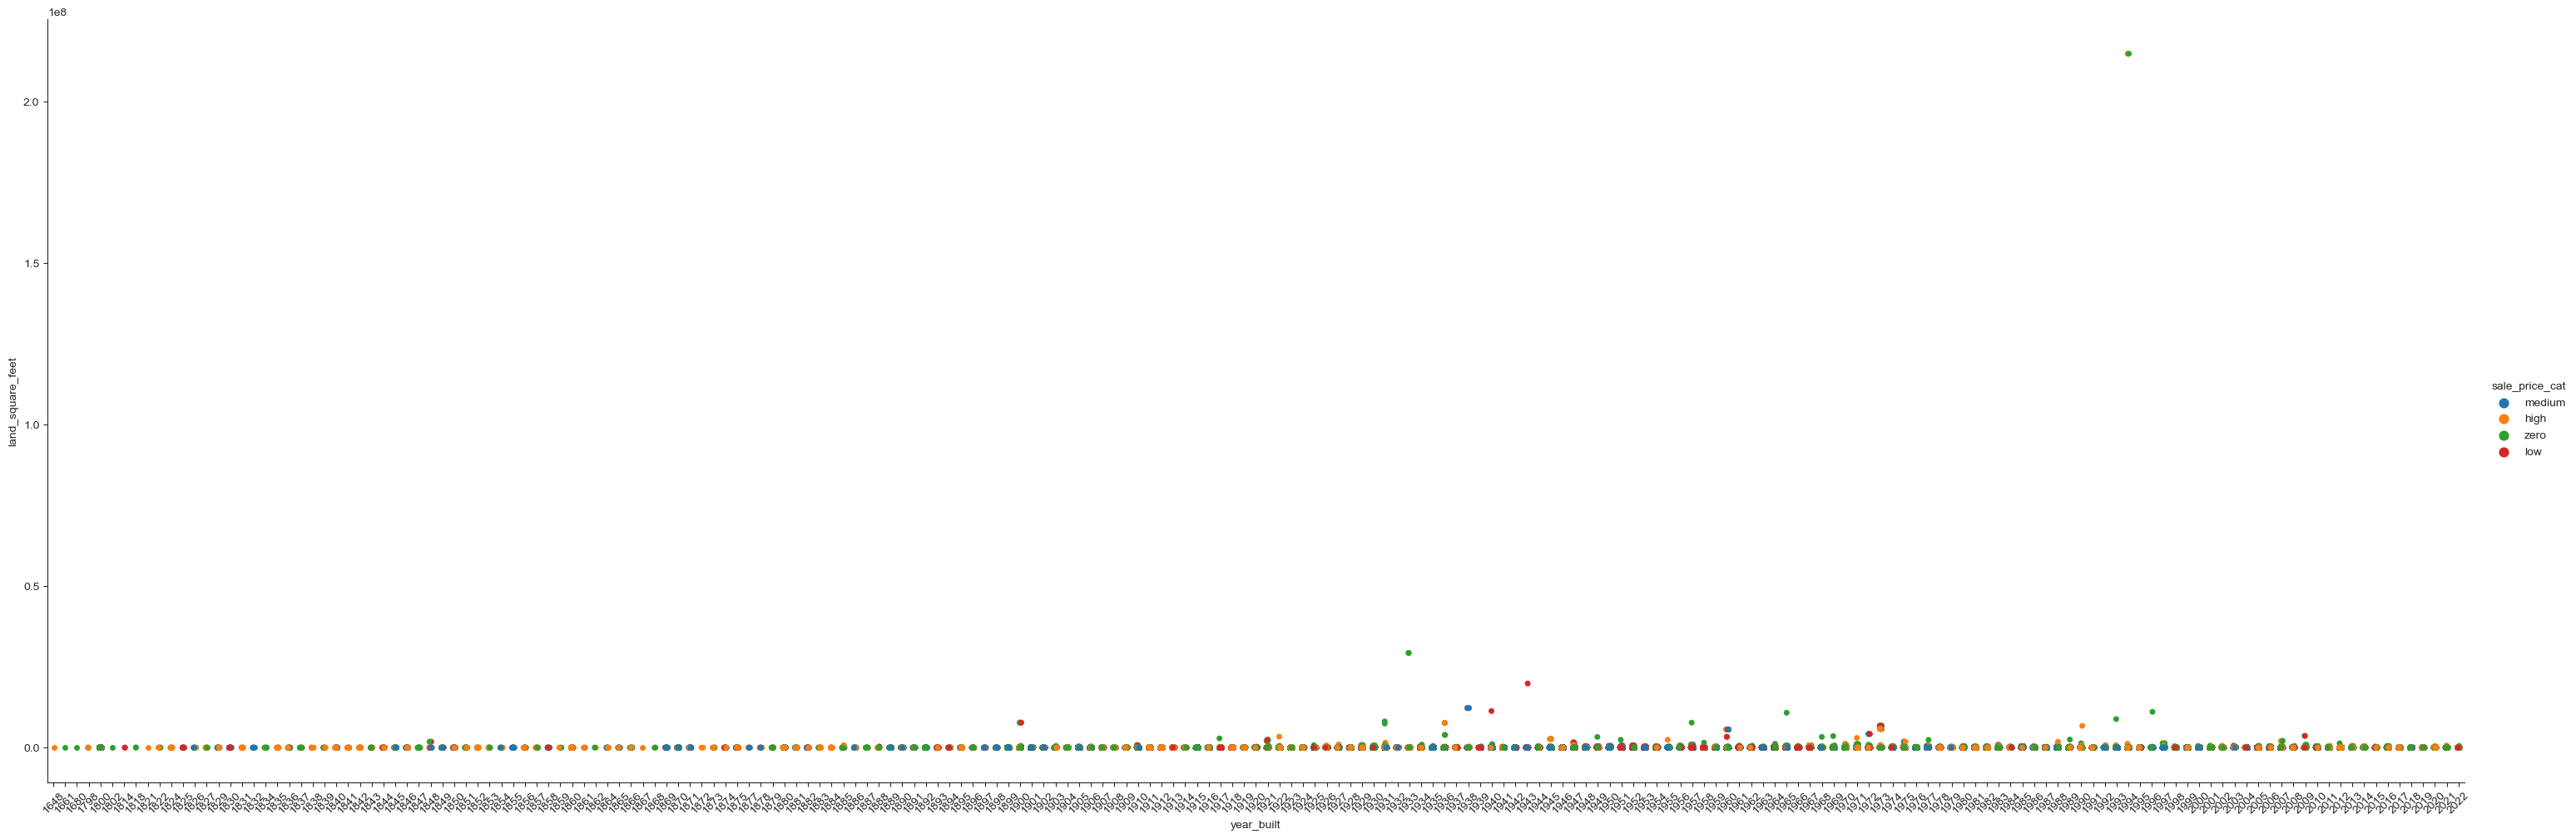

In [44]:
# Create categorical plot to visualise effect of building age and property size on sale price
# Choose plot style
sns.set_style('ticks')

# Create plot and adjust height and widt
g=sns.catplot(data=df, x='year_built', y='land_square_feet', hue='sale_price_cat', height=10, aspect=3)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Save visual
plt.savefig('2023-05-28_catplot-buildage-size-price')

As has been noted earlier, it would be interesting to look at this plot again later after exlusion of the large property size outlier. From the plot as it is, it seems that there is no clear effect of neither property size nor property age on sale price. 

### 02.4.3 Effect of building tax class on sale price

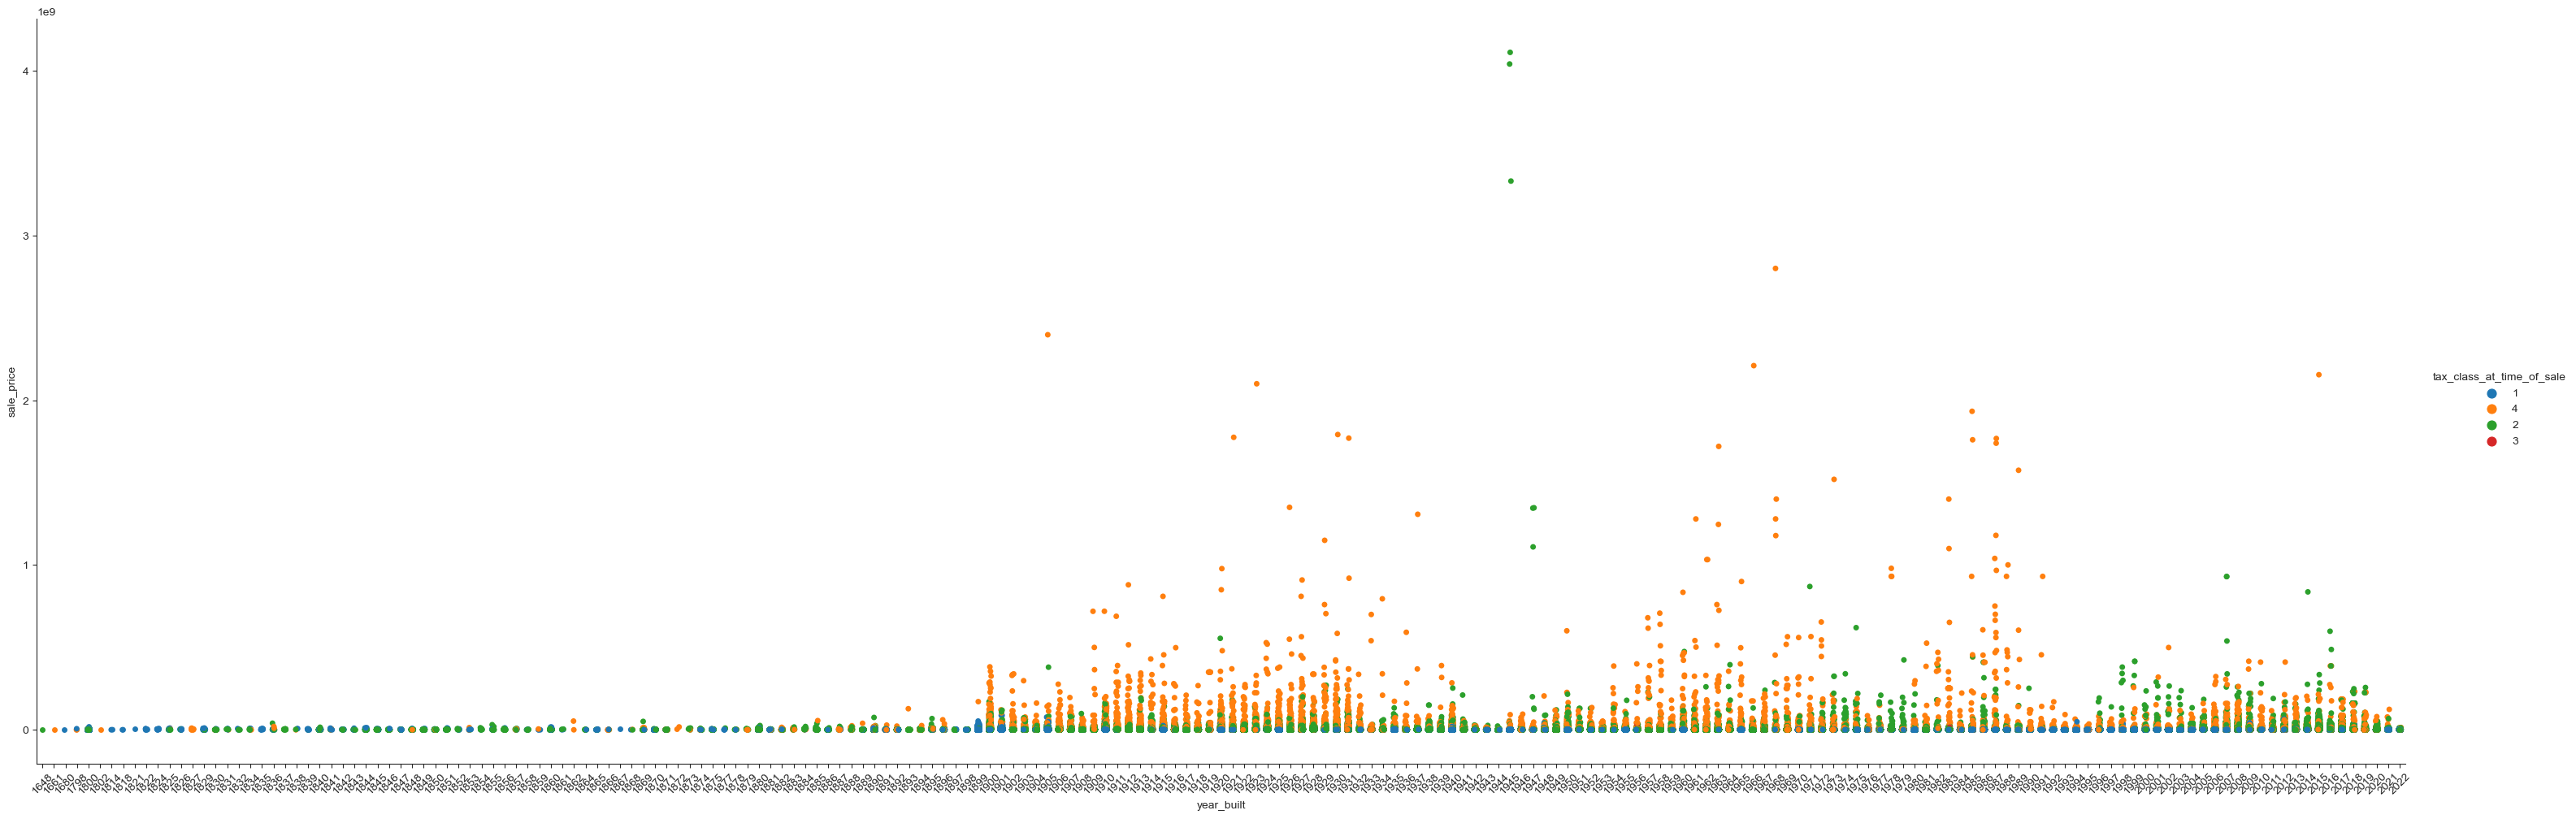

In [45]:
# Create categorical plot to visualise effect of building tax class on sale price
# Choose plot style
sns.set_style('ticks')

# Create plot and adjust height and width
g=sns.catplot(data=df, x='year_built', y='sale_price', hue='tax_class_at_time_of_sale', height=10, aspect=3)

#Rotate x-axis labels
plt.xticks(rotation=45)

# Save visual
plt.savefig('2023-05-28_catplot-taxclass-price')

This plot shows that properties with buildings falling into tax class 1 sell for relatively low prices (blue dots for tax class 1 are found low on the y-axis only). While there are some properties with extremely high prices falling into tax class 2, most high-priced properties fall into tax class 4. 

# 03 Export dataframe

In [46]:
# Export dataframe
df.to_pickle(os.path.join(path, '2023-05-28_df.pkl'))